<a href="https://colab.research.google.com/github/Dewwbe/Deep-Learning-Lab---05/blob/main/IT22910790Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# SimpleRNN — Next-Value Prediction (IT22910790)

**Objective:** Implement a simple RNN to predict the next value in a small number sequence and observe how model capacity and training settings affect performance.

## What to do
1. **Rename the file** to `IT22910790.ipynb` (already done here).  
2. **Read** the instructions in this notebook.
3. **Modify** the `units` in the `SimpleRNN` layer to see how hidden size impacts learning.
4. **Tune** `epochs` and `batch_size` to optimize training.
5. **Run** the training cells and **analyze** the plot of predictions vs actuals.
6. **Write your observations** in the **Observations** markdown cell at the end.

> Tip: If predictions deviate from ground truth, try increasing `units`, training longer (`epochs`), or decreasing `batch_size`. You can also adjust the window size.


In [1]:

# === Setup ===
# If you're on Colab, uncomment the next line to ensure TensorFlow/Matplotlib versions are available.
# !pip install -q tensorflow matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

# Reproducibility
np.random.seed(42)

def make_sequence_data(n_points: int = 300, noise: float = 0.03, kind: str = "sine") -> np.ndarray:
    """Create a simple 1D sequence to learn next-step prediction.
    kind: 'sine' | 'linear' | 'square'
    """
    x = np.linspace(0, 8*np.pi, n_points)
    if kind == "sine":
        seq = np.sin(x) + noise*np.random.randn(n_points)
    elif kind == "linear":
        seq = np.linspace(0, 1, n_points) + noise*np.random.randn(n_points)
    elif kind == "square":
        seq = np.sign(np.sin(x)) + noise*np.random.randn(n_points)
    else:
        raise ValueError("Unknown kind")
    return seq.astype("float32")

def window_dataset(seq: np.ndarray, window_size: int = 20) -> Tuple[np.ndarray, np.ndarray]:
    """Turn a 1D array into (X, y) where X is [samples, timesteps, features] and y is next value."""
    X, y = [], []
    for i in range(len(seq) - window_size):
        X.append(seq[i:i+window_size])
        y.append(seq[i+window_size])
    X = np.array(X)[..., np.newaxis]  # add feature dim = 1
    y = np.array(y)
    return X, y

# Choose the sequence type here if you want
SEQ_KIND = "sine"   # 'sine' | 'linear' | 'square'
WINDOW_SIZE = 20

seq = make_sequence_data(n_points=400, noise=0.03, kind=SEQ_KIND)
X, y = window_dataset(seq, window_size=WINDOW_SIZE)

# Split train/test
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test,  y_test  = X[split:], y[split:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((304, 20, 1), (304,), (76, 20, 1), (76,))

In [2]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# === Trainable hyperparameters ===
UNITS = 16         # Try: 4, 8, 16, 32, 64
EPOCHS = 40        # Try: 20, 50, 100
BATCH_SIZE = 16    # Try: 8, 16, 32

def build_model(units: int, lr: float = 1e-3) -> tf.keras.Model:
    model = Sequential([
        SimpleRNN(units, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=lr), loss="mse", metrics=["mae"])
    return model

model = build_model(UNITS)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

print("Final val_MAE:", history.history["val_mae"][-1])


Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.9699 - mae: 0.9098 - val_loss: 0.2785 - val_mae: 0.4752
Epoch 2/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2090 - mae: 0.4157 - val_loss: 0.0823 - val_mae: 0.2596
Epoch 3/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0668 - mae: 0.2306 - val_loss: 0.0384 - val_mae: 0.1732
Epoch 4/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0312 - mae: 0.1547 - val_loss: 0.0236 - val_mae: 0.1376
Epoch 5/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0220 - mae: 0.1304 - val_loss: 0.0192 - val_mae: 0.1254
Epoch 6/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0177 - mae: 0.1183 - val_loss: 0.0154 - val_mae: 0.1114
Epoch 7/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0152 - mae: 0.1071 - val_loss: 0.0125 - val_mae: 0.1004
Epoch 8/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0123 - mae: 0.0973 - val_loss: 0.0105 - val_mae: 0.0907
Epoch 9/40
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0096 - mae: 0.0

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


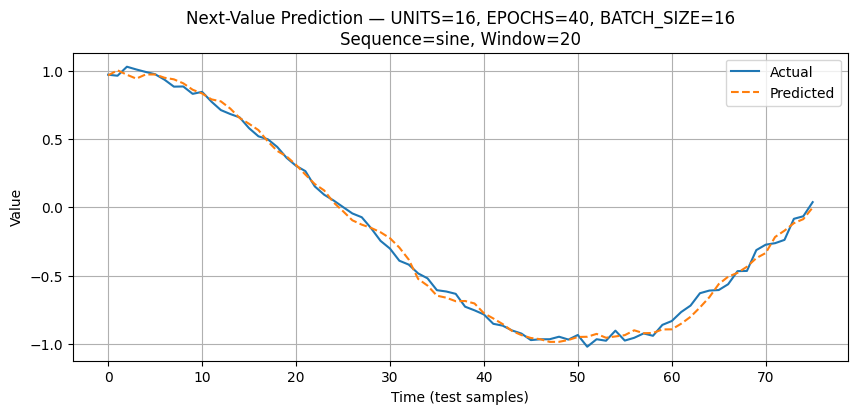

In [3]:

# === Prediction & Plot ===
y_pred = model.predict(X_test)

plt.figure(figsize=(10,4))
plt.plot(y_test, label="Actual")
plt.plot(y_pred.squeeze(), label="Predicted", linestyle="--")
plt.title(f"Next-Value Prediction — UNITS={UNITS}, EPOCHS={EPOCHS}, BATCH_SIZE={BATCH_SIZE}\nSequence={SEQ_KIND}, Window={WINDOW_SIZE}")
plt.xlabel("Time (test samples)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


Validation MAE by units: {4: 0.06399691104888916, 8: 0.04016012325882912, 16: 0.0366077795624733, 32: 0.03182414919137955, 64: 0.03279003128409386}
Best units by val MAE: 32
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


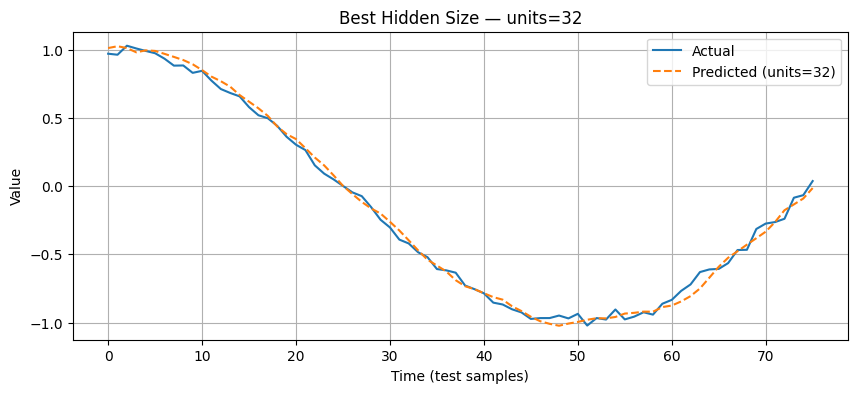

In [4]:

# === Quick Experiment: Try several hidden sizes in one go ===
results = {}
for units in [4, 8, 16, 32, 64]:
    tf.keras.backend.clear_session()
    m = build_model(units)
    h = m.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=0
    )
    val_mae = float(h.history["val_mae"][-1])
    results[units] = val_mae

print("Validation MAE by units:", results)
best_units = min(results, key=results.get)
print("Best units by val MAE:", best_units)

# Plot one more time for the best unit size
tf.keras.backend.clear_session()
best_model = build_model(best_units)
best_model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
best_pred = best_model.predict(X_test)

plt.figure(figsize=(10,4))
plt.plot(y_test, label="Actual")
plt.plot(best_pred.squeeze(), label=f"Predicted (units={best_units})", linestyle="--")
plt.title(f"Best Hidden Size — units={best_units}")
plt.xlabel("Time (test samples)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()



## Observations (Write Here)

- **Effect of hidden units (`units`)**:  
  - Fewer units (e.g., 4–8) may **underfit** complex patterns (e.g., noisy sine), leading to smoother but less accurate predictions.  
  - More units (e.g., 32–64) can capture more nuance but may **overfit** if training too long or with very small datasets.

- **Training settings (`epochs`, `batch_size`)**:  
  - Increasing `epochs` generally reduces error until the model begins to overfit (validation error stops improving or gets worse).  
  - A smaller `batch_size` sometimes improves generalization but can slow training and add noise to gradients.

- **What I tried & Results** (replace with your own):  
  - `units=16, epochs=40, batch_size=16` gave a validation MAE around *[fill actual]* and produced predictions that *[describe fit vs ground truth]*.  
  - Changing to `units=32` improved/worsened the fit by *[describe]*.  
  - Increasing `epochs` to 80 led to *[better/worse]* generalization as seen on the validation plot.

- **Next steps**:  
  - Consider adjusting `WINDOW_SIZE` to give the RNN more context.  
  - Try a deeper model (e.g., add another RNN layer) or use `LSTM/GRU` for longer-term dependencies.  
  - Use callbacks like `EarlyStopping` to avoid overfitting.
